# EDA_FE 과제

#### <font color='orange'> - 약간 매운맛


by YBIGTA 16기 DA Team 김지환


<img src='https://i.imgur.com/cqdVyfs.jpg'>

---

여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
df = pd.read_csv("airbnb_listings.csv", index_col=0)

/var/folders/x1/tzlfd4112pvbltq49sgc2lxc0000gp/T/ipykernel_84619/725923707.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb_listings.csv", index_col=0)


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

# EDA


### 1) 전체 데이터 확인


- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>


In [3]:
# Q1
pd.set_option("display.max_columns", None)
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---

### 2) 결측치 확인


- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
  <font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)


In [4]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

In [5]:
# Q2
missing_sum = df.isnull().sum()
missing_percent = missing_sum * 100 / len(df)
null_count_table = pd.concat(
    [missing_sum, missing_percent], axis=1, keys=["missing_num", "missing_%"]
)
null_count_table = null_count_table[null_count_table["missing_num"] > 0].sort_values(
    "missing_num", ascending=False
)
null_count_table

,missing_num,missing_%
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.


<Axes: >

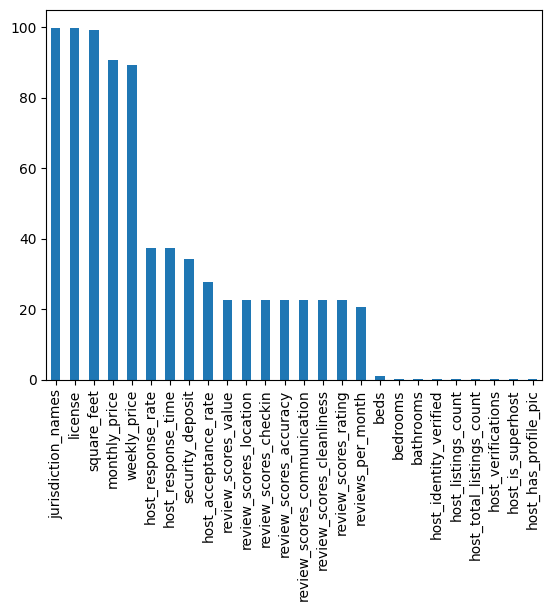

In [6]:
# Q3
null_count_table["missing_%"].plot.bar()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.


In [7]:
# Q4
df[df["beds"].isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---

### 3) 범주형 변수 확인

<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.


In [8]:
drop_col = [
    "jurisdiction_names",
    "license",
    "square_feet",
    "monthly_price",
    "weekly_price",
    "host_response_rate",
    "host_response_time",
    "security_deposit",
    "host_acceptance_rate",
    "review_scores_location",
    "review_scores_value",
    "review_scores_checkin",
    "review_scores_accuracy",
    "review_scores_communication",
    "review_scores_cleanliness",
    "review_scores_rating",
    "reviews_per_month",
    "beds",
]

In [9]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.

#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.


<Axes: xlabel='room_type'>

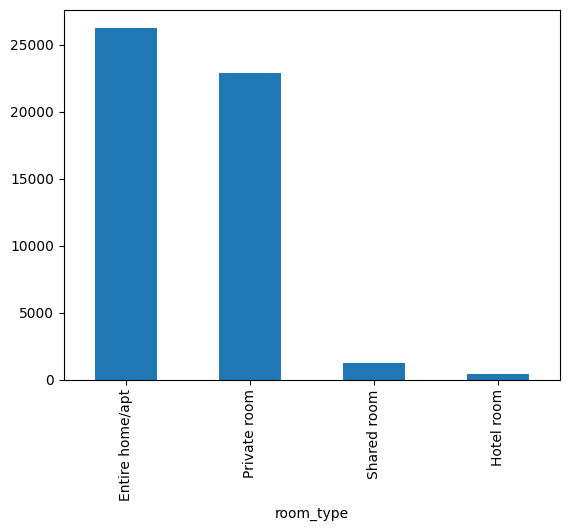

In [11]:
# Q5
df["room_type"].value_counts().plot.bar()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.


<Axes: xlabel='room_type'>

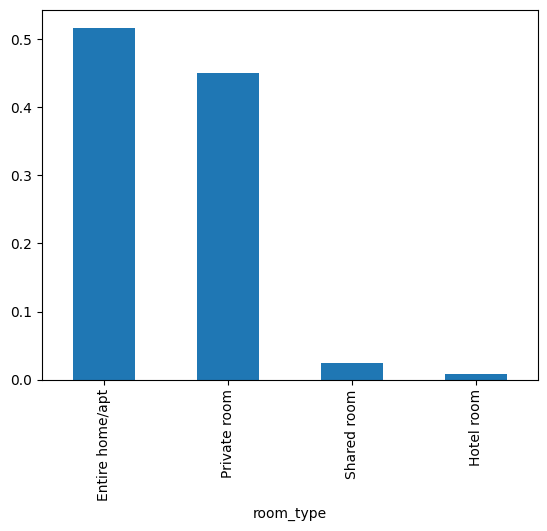

In [12]:
# Q6
df["room_type"].value_counts().map(lambda x: x / len(df)).plot.bar()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.

#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.


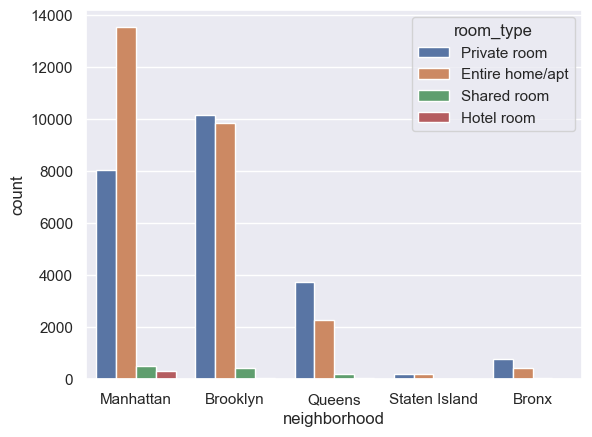

In [16]:
# Q7
sns.set()
sns.countplot(data=df, x="neighborhood", hue="room_type")
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.

#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.


<Axes: xlabel='neighborhood', ylabel='price'>

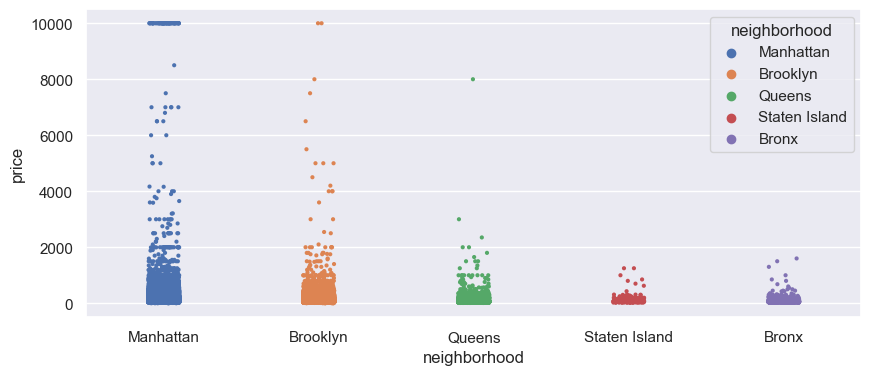

In [17]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(10, 4))
sns.stripplot(
    data=df, x="neighborhood", y="price", hue="neighborhood", jitter=0.1, size=3
)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?


Room_type과 price는 지역에 종속적이라고 볼 수 있습니다.
Manhattan과 Brooklyn은 방의 개수가 많고, 가격도 상대적으로 높습니다.
특히 가격이 가장 비싼 편인 Manhattan은, 방의 개수가 비슷하지만 가격이 더 저렴한 편인 Brooklyn에 비해 Entire home/apt의 비율이 높습니다.


---

### 4) 연속형 변수 확인


- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.

#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.


<Axes: >

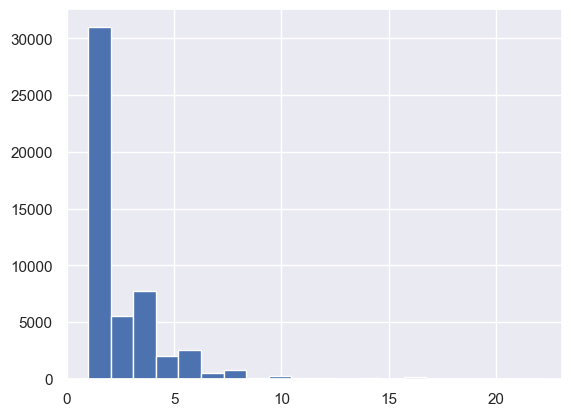

In [20]:
# Q10
df["accommodates"].hist(bins=20)

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.

#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.


<Axes: >

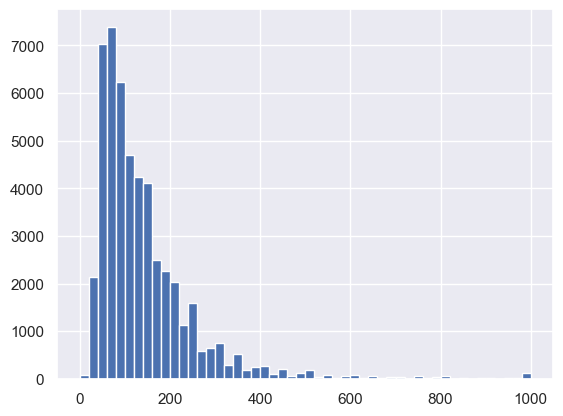

In [38]:
# Q11
df[df["price"] <= 1000]["price"].hist(bins=50)

- **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>


---

### 5) Feature Engineering


feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.


In [41]:
df = pd.read_csv("airbnb_listings.csv", index_col=0)

/var/folders/x1/tzlfd4112pvbltq49sgc2lxc0000gp/T/ipykernel_7442/725923707.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb_listings.csv", index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.

#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.


In [42]:
# Q12
size = len(df)
df.dropna(thresh=int(size * 0.75), axis=1, inplace=True)
columns_to_drop_row = df.columns[df.isnull().sum(axis=0) < int(size * 0.25)]
df.dropna(subset=columns_to_drop_row, axis=0, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39091 entries, 1 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39091 non-null  int64  
 1   host_is_superhost                 39091 non-null  object 
 2   host_listings_count               39091 non-null  float64
 3   host_total_listings_count         39091 non-null  float64
 4   host_verifications                39091 non-null  object 
 5   host_has_profile_pic              39091 non-null  object 
 6   host_identity_verified            39091 non-null  object 
 7   neighborhood                      39091 non-null  object 
 8   latitude                          39091 non-null  float64
 9   longitude                         39091 non-null  float64
 10  is_location_exact                 39091 non-null  object 
 11  property_type                     39091 non-null  object 
 12  room_type

In [44]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..

#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [45]:
# Q13-1)
# `room_type` 과 `neighborhood` 에 encoding 적용으로 범주형 변수를 수치형 변수로 변환합니다. 범주 사이에 순서나 우열이 없으니 one-hot encoding을 적용합니다.
# TODO: get_dummies 사용
df["room_type"] = df["room_type"].map(
    {
        "Private room": [1, 0, 0, 0],
        "Entire home/apt": [0, 1, 0, 0],
        "Shared room": [0, 0, 1, 0],
        "Hotel room": [0, 0, 0, 1],
    }
)
df["neighborhood"] = df["neighborhood"].map(
    {
        "Manhattan": [1, 0, 0, 0, 0],
        "Brooklyn": [0, 1, 0, 0, 0],
        "Queens": [0, 0, 1, 0, 0],
        "Staten Island": [0, 0, 0, 1, 0],
        "Bronx": [0, 0, 0, 0, 1],
    }
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39091 entries, 1 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39091 non-null  int64  
 1   host_is_superhost                 39091 non-null  object 
 2   host_listings_count               39091 non-null  float64
 3   host_total_listings_count         39091 non-null  float64
 4   host_verifications                39091 non-null  object 
 5   host_has_profile_pic              39091 non-null  object 
 6   host_identity_verified            39091 non-null  object 
 7   neighborhood                      39091 non-null  object 
 8   latitude                          39091 non-null  float64
 9   longitude                         39091 non-null  float64
 10  is_location_exact                 39091 non-null  object 
 11  property_type                     39091 non-null  object 
 12  room_type

In [46]:
df[["latitude", "longitude"]].describe()

,latitude,longitude
count,39091.000000,39091.000000
mean,40.728276,-73.949589
std,0.055517,0.048337
min,40.508680,-74.239860
25%,40.688140,-73.982510
50%,40.721980,-73.954150
75%,40.763060,-73.932320
max,40.910550,-73.712990


In [47]:
# Q13-2)
# latitude, longitude는 5개 지역의 경위도에 bound될 것이므로, 스케일링을 통해 값의 범위를 줄여 유의미한 숫자로 변환합니다. 위에 describe한 것처럼 이상값은 없으므로 min-max scaling을 적용합니다.
df["latitude"] = (df["latitude"] - df["latitude"].min()) / (
    df["latitude"].max() - df["latitude"].min()
)
df["longitude"] = (df["longitude"] - df["longitude"].min()) / (
    df["longitude"].max() - df["longitude"].min()
)
df[["latitude", "longitude"]].describe()

,latitude,longitude
count,39091.000000,39091.000000
mean,0.546436,0.550935
std,0.138145,0.091744
min,0.000000,0.000000
25%,0.446562,0.488451
50%,0.530769,0.542278
75%,0.632991,0.583711
max,1.000000,1.000000


In [48]:
# Q13-3)

---
EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다
---


- Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.

1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing\_%를 새로운 column으로 추가
   </font>


- **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
